In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

colors = [
        '#08F7FE',
        '#FE53BB',
        '#F5D300',
        '#00ff41',
    ]
# create a custom color palette
custom_palette = sns.color_palette(colors)

sns.set_theme(
    palette=custom_palette,
    font="Open Sans",
    rc={
        "font.style": "normal",
        "font.weight": "light",
        "font.size": 14,
        "axes.facecolor": "#1A172A",
        "grid.color": "#2B2646",
        "grid.linestyle": "-",
        "figure.facecolor": "'#1A172A'",
        "figure.titlesize": 25,
        "text.color": "#F3F3F3",
        "xtick.color": "#F3F3F3",
        "ytick.color": "#F3F3F3",
        "axes.labelcolor": "#F3F3F3",
        "axes.grid": True,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.title_fontsize": 12
    }
)

In [16]:
data = pd.read_pickle('../data/conso-processed.pkl')
data = data.loc[data.index.year != 2023]

In [17]:
data.head ()

,code_insee_region,libelle_region,nature,date,heure,consommation,thermique,nucleaire,eolien,solaire,...,tco_nucleaire,tch_nucleaire,tco_eolien,tch_eolien,tco_solaire,tch_solaire,tco_hydraulique,tch_hydraulique,tco_bioenergies,tch_bioenergies
date_heure,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:30:00+01:00,44,Grand Est,Données définitives,2013-01-01,00:30,4943,319,9137,1109,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2013-01-01 00:30:00+01:00,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:30,8173,252,12069,257,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2013-01-01 00:30:00+01:00,75,Nouvelle-Aquitaine,Données définitives,2013-01-01,00:30,5464,240,4993,175,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2013-01-01 00:30:00+01:00,53,Bretagne,Données définitives,2013-01-01,00:30,3050,58,<NA>,107,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2013-01-01 00:30:00+01:00,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:30,5570,537,<NA>,12,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


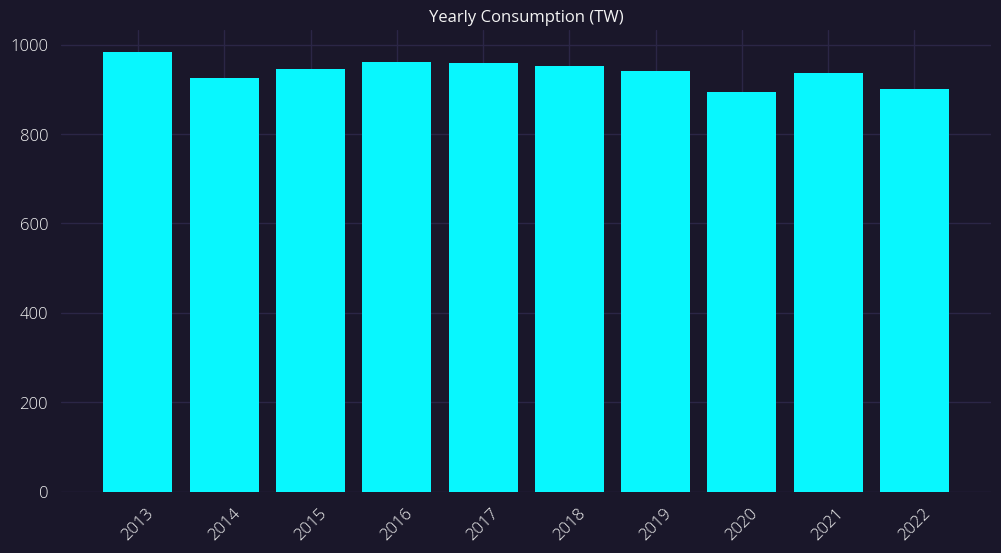

In [18]:
# Aggregate the data by year and sum the consommation
data['year'] = data.index.year
yearly_consumption = data.groupby('year')['consommation'].sum()
# convert consommation to TW
yearly_consumption = yearly_consumption / 1_000_000

# Plot the yearly consumption
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(
    yearly_consumption.index,
    yearly_consumption,
    linewidth=0
)

plt.title('Yearly Consumption (TW)')
# show all x ticks
plt.xticks(yearly_consumption.index)
plt.xticks(rotation=45)
# remove the facetgrid
sns.despine(left=True, bottom=True)


plt.show()

Text(0.5, 1.0, 'Average Monthly Consumption (MW)')

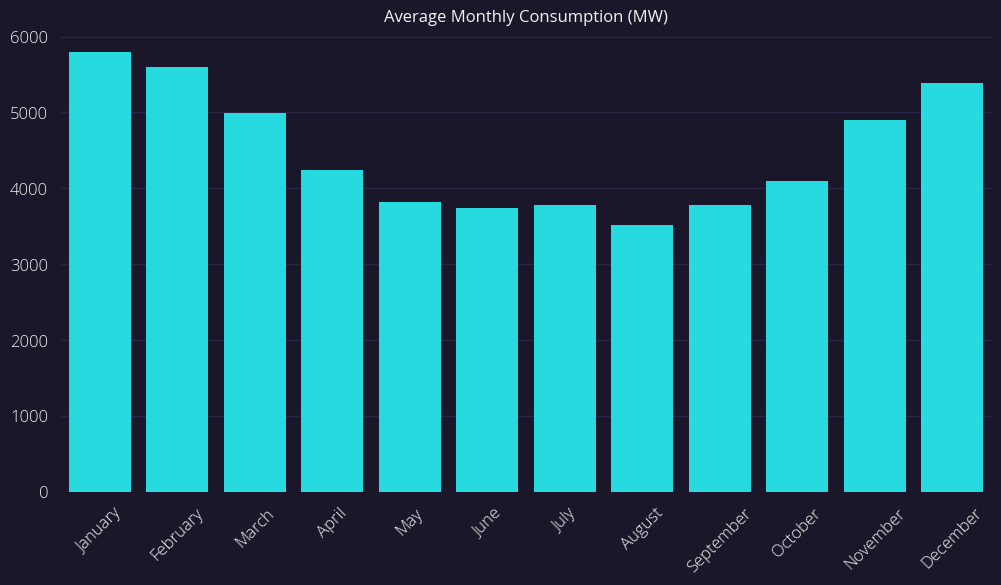

In [28]:
# What about the consumption by month, on average?
month_consomption_mean = data.resample('ME')['consommation'].mean()

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(
    x=month_consomption_mean.index.month_name(),
    y=month_consomption_mean,
    ax=ax,
    linewidth=0,
    errorbar=None
)
sns.despine(left=True, bottom=True)
# pivot x labels
plt.xticks(rotation=45)
# hide x label and y label
plt.xlabel('')
plt.ylabel('')

plt.title('Average Monthly Consumption (MW)')

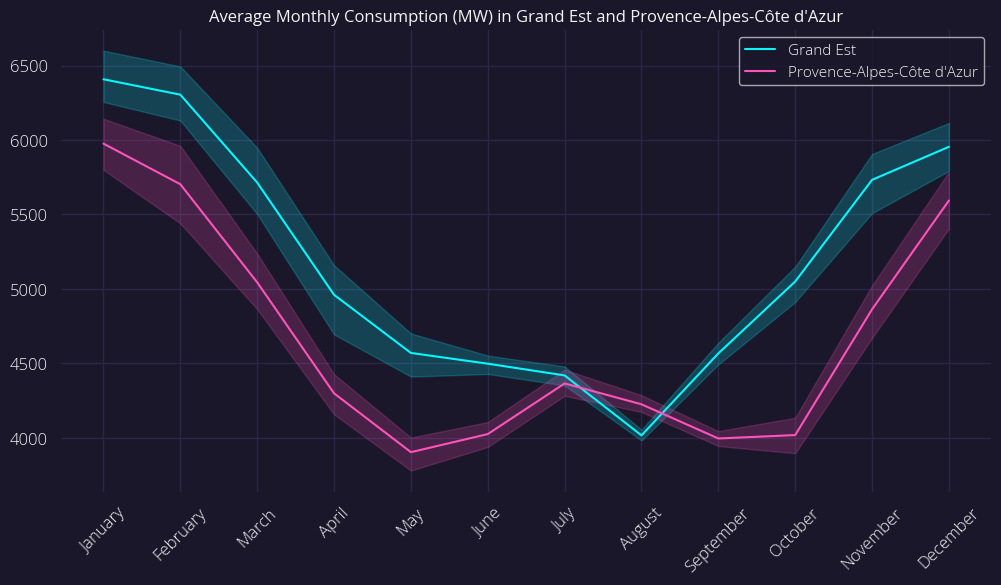

In [35]:
region_1 = "Grand Est"
region_2 = "Provence-Alpes-Côte d'Azur"

region_1_data = data.loc[data['libelle_region'] == region_1].resample('ME')['consommation'].mean()
region_2_data = data.loc[data['libelle_region'] == region_2].resample('ME')['consommation'].mean()

# Compare the consumption of two regions
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    x=region_1_data.index.month_name(),
    y=region_1_data,
    ax=ax,
    label=region_1
)

sns.lineplot(
    x=region_2_data.index.month_name(),
    y=region_2_data,
    ax=ax,
    label=region_2
)

plt.title(f'Average Monthly Consumption (MW) in {region_1} and {region_2}')
plt.xlabel('')
plt.ylabel('')

plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)

plt.show()

# What can we say about this ?
# As expected, the consumption is higher for a northern region in winter.
# Something interesting is that the consumption in the southern region is higher in summer.